In [1]:
import mglearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_boston, load_iris
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor, Lasso, ElasticNet
import warnings
warnings.simplefilter('ignore')

### 릿지 회귀(Ridge Regression)

In [2]:
boston = load_boston()
boston_df = pd.DataFrame( boston.data, columns=boston.feature_names )
boston_df['MEDV'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
x_data = boston_df.iloc[:,:-1]
y_data = boston_df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split( x_data, y_data, test_size=0.2, random_state=1 )

In [4]:
model_ridge = make_pipeline( StandardScaler(),  Ridge() )
model_ridge.fit( x_train, y_train )
print(f'train data R2 : { model_ridge.score( x_train , y_train ) }' )
print(f'test data R2  : { model_ridge.score( x_test , y_test ) }' )

train data R2 : 0.729336032904444
test data R2  : 0.763403805803235


In [5]:
model_ridge5 = make_pipeline( StandardScaler(),  Ridge( alpha=5 ) )
model_ridge5.fit( x_train, y_train )
print(f'train data R2 : { model_ridge5.score( x_train , y_train ) }' )
print(f'test data R2  : { model_ridge5.score( x_test , y_test ) }' )

train data R2 : 0.7289067264142005
test data R2  : 0.7629020804027657


In [6]:
model_ridge10 = make_pipeline( StandardScaler(),  Ridge( alpha=10 ) )
model_ridge10.fit( x_train, y_train )
print(f'train data R2 : { model_ridge10.score( x_train , y_train ) }' )
print(f'test data R2  : { model_ridge10.score( x_test , y_test ) }' )

train data R2 : 0.7279158914928879
test data R2  : 0.7616503886395203


### 라쏘 회귀(Lasso Regression)

In [7]:
model_Lasso = make_pipeline( StandardScaler(),  Lasso(alpha=0.5) )
model_Lasso.fit( x_train, y_train )
print(f'train data R2 : { model_Lasso.score( x_train , y_train ) }' )
print(f'test data R2  : { model_Lasso.score( x_test , y_test ) }' )

train data R2 : 0.6750322095123922
test data R2  : 0.694723828834546


In [8]:
model_lasso = Lasso(alpha=0.5 )
model_lasso.fit( x_train, y_train )
print(f'train data R2 : { model_lasso.score( x_train , y_train ) }' )
print(f'test data R2  : { model_lasso.score( x_test , y_test ) }' )

train data R2 : 0.7003419060083982
test data R2  : 0.7092912054989274


In [9]:
param_value = {'alpha':[ 0.0001, 0.01, 1, 2, 3, 4 ] }
modelLasso  = Lasso()
gridSearch  = GridSearchCV( modelLasso, param_grid=param_value, cv=5 )  # cv : 교차검정도 해줌. 디폴트값 5
gridSearch.fit( x_train, y_train )
print(gridSearch.best_params_)
print(gridSearch.best_score_)

{'alpha': 0.0001}
0.7025122353642761


In [10]:
gridSearch.cv_results_

{'mean_fit_time': array([0.00160227, 0.00119672, 0.00139618, 0.00099735, 0.00159588,
        0.00099716]),
 'std_fit_time': array([4.94091098e-04, 3.98945819e-04, 4.88616574e-04, 9.53674316e-08,
        4.88538753e-04, 2.43140197e-07]),
 'mean_score_time': array([0.00059862, 0.00079794, 0.00039897, 0.0009973 , 0.00039887,
        0.00059857]),
 'std_score_time': array([4.88772401e-04, 3.98969665e-04, 4.88636039e-04, 1.50789149e-07,
        4.88519238e-04, 4.88733421e-04]),
 'param_alpha': masked_array(data=[0.0001, 0.01, 1, 2, 3, 4],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.0001},
  {'alpha': 0.01},
  {'alpha': 1},
  {'alpha': 2},
  {'alpha': 3},
  {'alpha': 4}],
 'split0_test_score': array([0.75353015, 0.75586519, 0.70366523, 0.64284088, 0.58853271,
        0.56033998]),
 'split1_test_score': array([0.69197238, 0.68651375, 0.59368928, 0.55999341, 0.53728771,
        0.51345391]),
 'split2

In [11]:
gridSearch.best_estimator_.predict( x_test )

array([32.65451755, 28.09425116, 18.02726711, 21.47629568, 18.82908552,
       19.88077272, 32.41998143, 18.06708964, 24.41908704, 27.00953035,
       27.03787347, 28.75393746, 21.15618569, 26.85041791, 23.38805586,
       20.66176498, 17.33031598, 38.24714047, 30.50412507,  8.74996034,
       20.80262417, 16.26920784, 25.21841717, 24.85309794, 31.38345601,
       10.71240508, 13.8046697 , 16.66025695, 36.52842352, 14.66802031,
       21.12315375, 13.95484118, 43.160864  , 17.97790542, 21.80116716,
       20.58470696, 17.60156619, 27.22266959,  9.46018155, 19.82795804,
       24.30765777, 21.18903539, 29.57143119, 16.33972352, 19.31295781,
       14.56458086, 39.20563841, 18.1096834 , 25.91031161, 20.32943949,
       25.16213668, 24.42813032, 25.07251632, 26.65826038,  4.55804761,
       24.08270516, 10.88692104, 26.89010932, 16.85748247, 35.88685368,
       19.55883708, 27.51889298, 16.58465045, 18.7722969 , 11.13779245,
       32.36427557, 36.7282874 , 21.96093821, 24.5767824 , 25.14

### 다중공선성, 과대 과소 적합

0.7003419060083982
0.7092912054989274


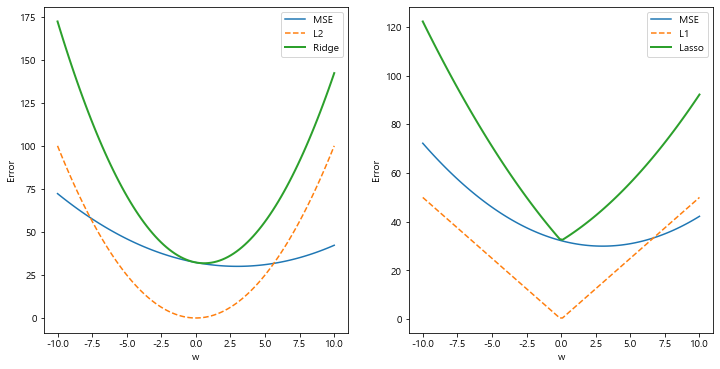

In [12]:
model_lasso = Lasso(alpha=0.5)
model_lasso.fit( x_train, y_train)
print( model_lasso.score( x_train, y_train ) )
print( model_lasso.score( x_test, y_test) )

param_value = {'alpha':[0.0001, 0.01, 1, 2, 3, 4] }
modelLasso = Lasso()
gridSearch = GridSearchCV( modelLasso, param_grid= param_value )
gridSearch.fit( x_train, y_train)
gridSearch.best_params_
gridSearch.cv_results_

fig = plt.figure(figsize=[12,6])
rng = np.linspace(-10,10,100)
mse = ( 0.5*(rng-3) )**2 + 30
l2 = rng**2
l1 = 5*np.abs(rng)
ridge = mse + l2
lasso = mse + l1

plt.subplot(1,2,1)
plt.plot(rng,mse,label='MSE')
plt.plot(rng,l2,'--',label='L2')
plt.plot(rng,ridge, lw=2, label='Ridge')
plt.xlabel('w'); plt.ylabel('Error')
plt.legend()

plt.subplot(1,2,2)
plt.plot(rng,mse,label='MSE')
plt.plot(rng,l1,'--',label='L1')
plt.plot(rng,lasso, lw=2, label='Lasso')
plt.xlabel('w'); plt.ylabel('Error')
plt.legend()
plt.show()

### 신축망(Elastic - Net)

In [13]:
model_elastic = ElasticNet( alpha=0.01, l1_ratio=0.5 )
model_elastic.fit( x_train, y_train )
print(f'train data R2 : { model_elastic.score( x_train , y_train ) }' )
print(f'test data R2  : { model_elastic.score( x_test , y_test ) }' )

train data R2 : 0.7231027704401572
test data R2  : 0.7639149100563346


In [14]:
param_value  = {'alpha':[ 0.0001, 0.01, 1, 2, 3, 4 ], 'ㅣ1_ratio':[ 0.1, 0.3, 0.5, 0.7, 0.8, 0.9 ] }
modelElastic = make_pipeline( StandardScaler(),  ElasticNet() )
#modelElastic = ElasticNet()
gridSearch   = GridSearchCV( modelElastic, param_grid=param_value, cv=10 ) 
#gridSearch.fit( x_train, y_train )  # 정규화 된 데이터를 줘야함.

### 다항 회귀(Polynomial Regression)

In [15]:
model = make_pipeline( PolynomialFeatures(degree=2), StandardScaler(), LinearRegression() )
model.fit( x_train, y_train )
print(f'train data R2 : { model.score( x_train , y_train ) }' )
print(f'test data R2  : { model.score( x_test , y_test ) }' )

train data R2 : 0.9264046957163291
test data R2  : 0.9116244055634332


### 신경망(NN : Neural Network)

(500, 1) (500, 1)


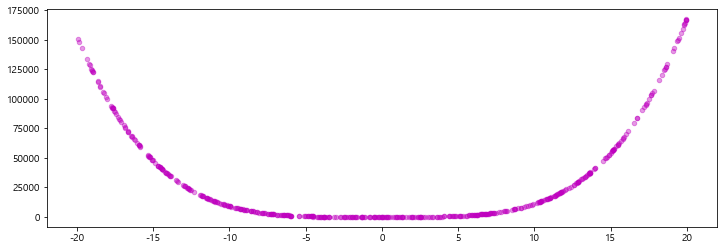

In [16]:
sample_size = 500
x = np.random.uniform(-20, 20, sample_size).reshape(-1, 1)
y = x**4 + x**3 + x**2 + x + np.random.normal(0, 10, sample_size).reshape(-1, 1)
print(x.shape, y.shape)
plt.figure(figsize=(12, 4))
plt.scatter(x, y, marker='o', s=20, alpha=0.4, c='m')
plt.show()

In [17]:
x_train, x_test, y_train, y_test = train_test_split( x, y, train_size=0.7, test_size=0.3)
model_lr = LinearRegression()
model_lr.fit( x_train, y_train )
model_lr.score( x_test, y_test )

-0.005711765595926677

In [18]:
modelML = MLPRegressor( hidden_layer_sizes=[1000, 4], max_iter=5000, alpha=0.005, verbose=0, random_state=1)
modelML.fit( x_train, y_train )
modelML.score( x_test, y_test )

0.9801224815556425

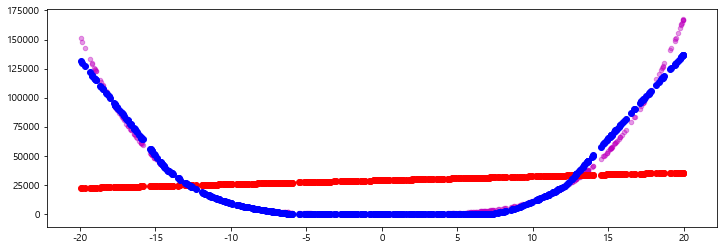

In [19]:
plt.figure(figsize=(12, 4))
plt.scatter( x, y, marker='o', s=20, alpha=0.4, c='m' )
plt.scatter( x, model_lr.predict(x), c='r' )
plt.scatter( x, modelML.predict(x), c='b' )
plt.show()